## Dataset Information


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

## Import modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/BigMart/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

<Axes: xlabel='variable', ylabel='count'>

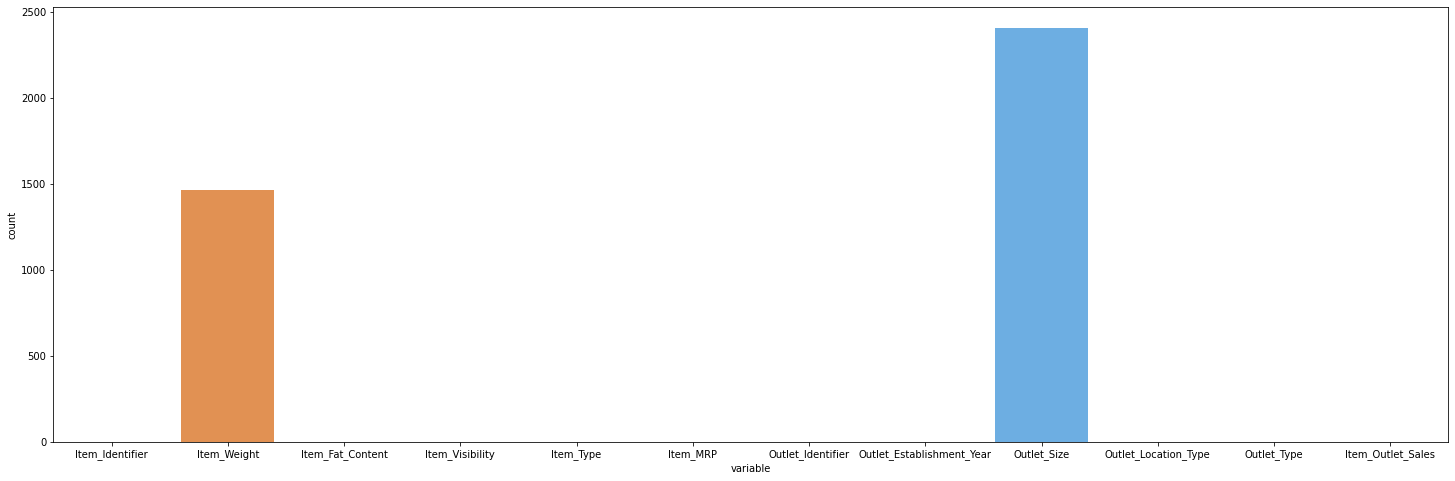

In [ ]:
null_count = pd.DataFrame(df.isnull().sum(), columns=['count']).reset_index()
null_count = null_count.rename(columns={'index': 'variable'})

fig, ax = plt.subplots(figsize=(25, 8))
sns.barplot(data=null_count, x='variable', y='count' )

<Axes: >

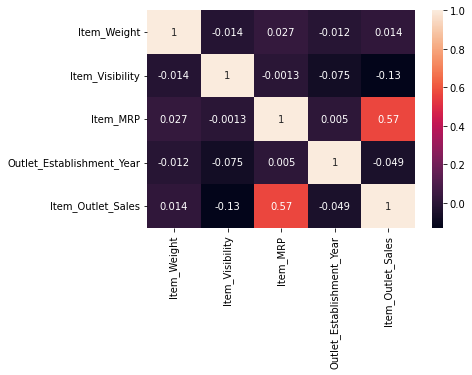

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
count_plots = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
dist_plots = ['Item_Outlet_Sales', 'Item_Weight', 'Item_Visibility', 'Item_MRP']

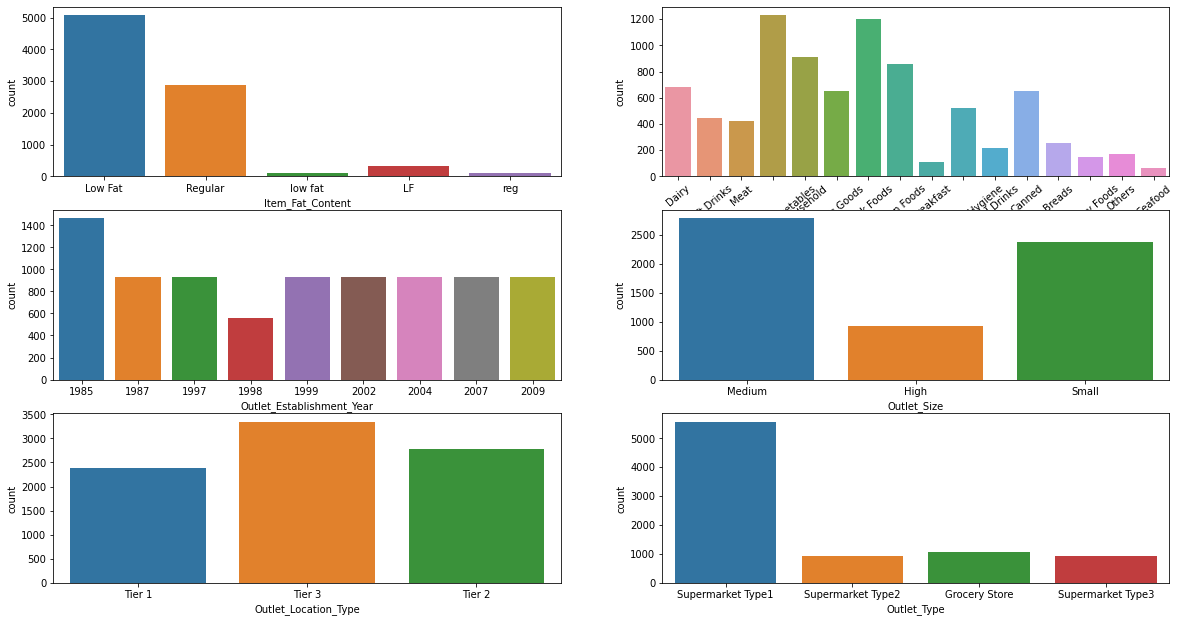

In [ ]:
# cat_plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
plt.subplots_adjust(top=1, bottom=0.2)
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]
ax5 = axs[2,0]
ax6 = axs[2,1]

for i in range(1,7):
  if i == 2:
    chart = sns.countplot(x=count_plots[i-1], data=df, ax=globals()['ax{}'.format(i)])
    l = list(df['Item_Type'].unique())
    chart.set_xticklabels(labels=l, rotation=40)
  else:
    sns.countplot(x=count_plots[i-1], data=df, ax=globals()['ax{}'.format(i)])

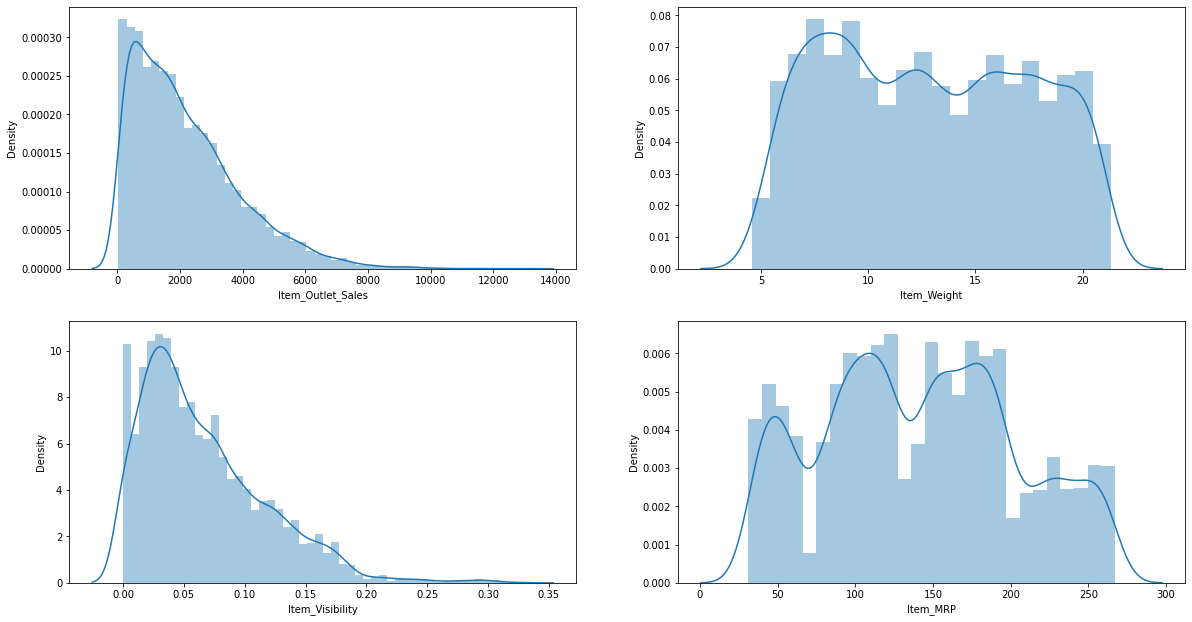

In [ ]:
# dist_plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(top=1, bottom=0.2)
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]

for i in range(1,5):
    sns.distplot(df[dist_plots[i-1]], ax=globals()['ax{}'.format(i)])

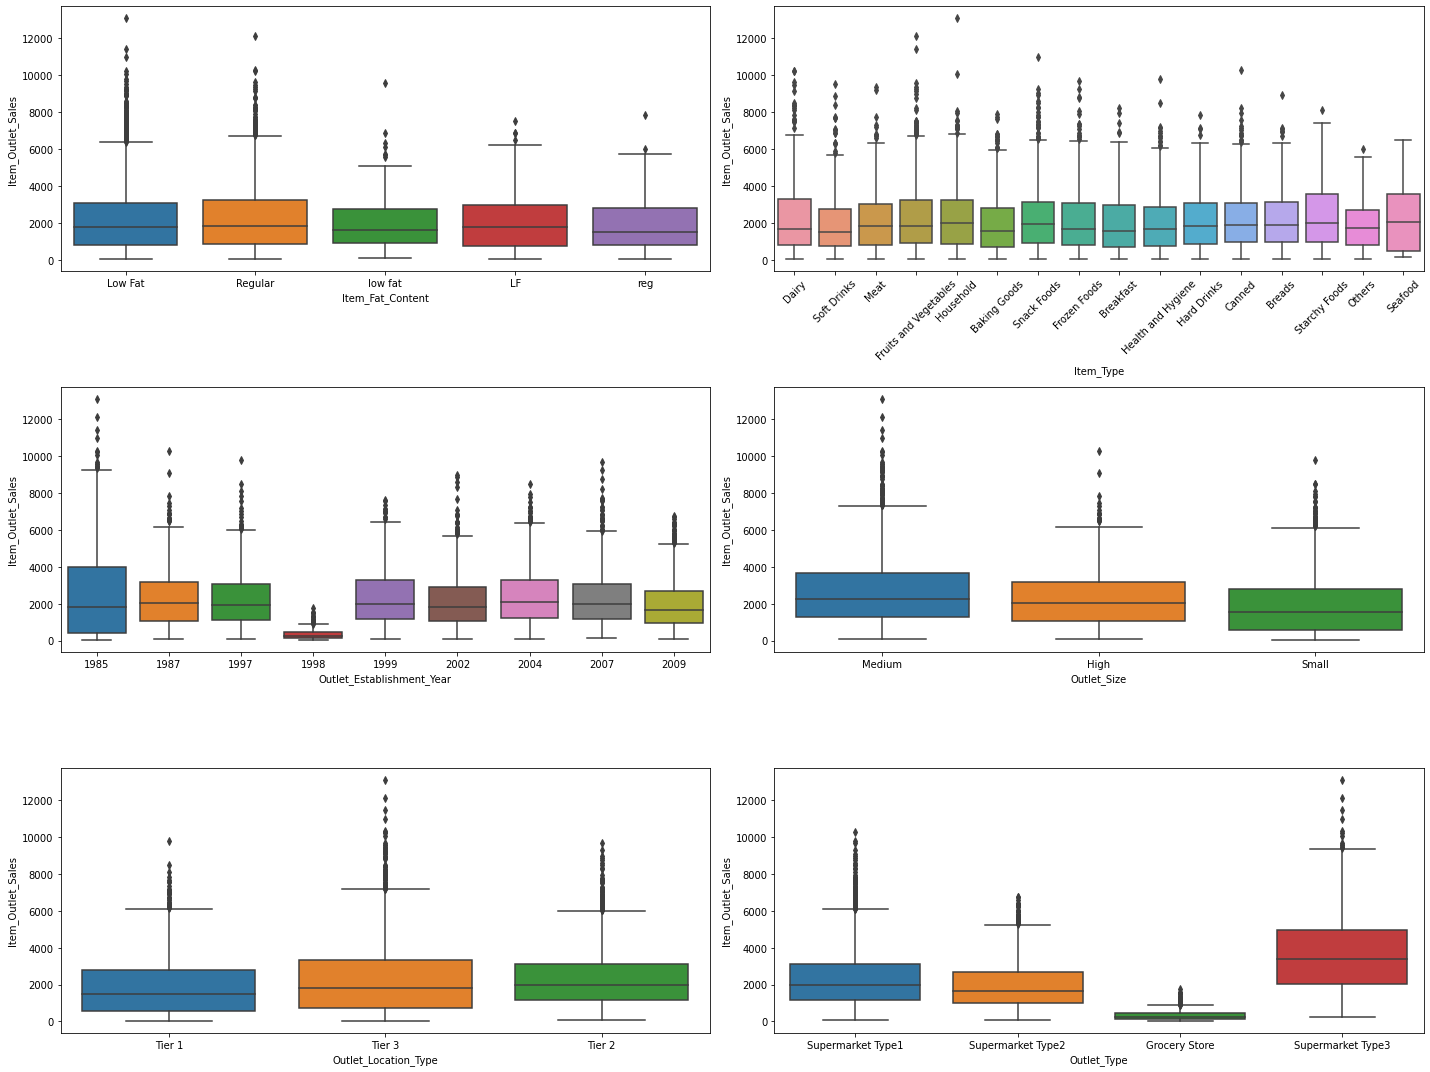

In [ ]:
# y와의 관계 확인 _범주형

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.boxplot(x=count_plots[0], y='Item_Outlet_Sales', data=df,  ax=axs[0,0])
chart = sns.boxplot(x=count_plots[1], y='Item_Outlet_Sales', data=df,  ax=axs[0,1])
l = list(df['Item_Type'].unique())
chart.set_xticklabels(labels=l, rotation=45)
sns.boxplot(x=count_plots[2], y='Item_Outlet_Sales', data=df,  ax=axs[1,0])
sns.boxplot(x=count_plots[3], y='Item_Outlet_Sales', data=df,  ax=axs[1,1])
sns.boxplot(x=count_plots[4], y='Item_Outlet_Sales', data=df,  ax=axs[2,0])
sns.boxplot(x=count_plots[5], y='Item_Outlet_Sales', data=df,  ax=axs[2,1])

plt.tight_layout()
plt.show()

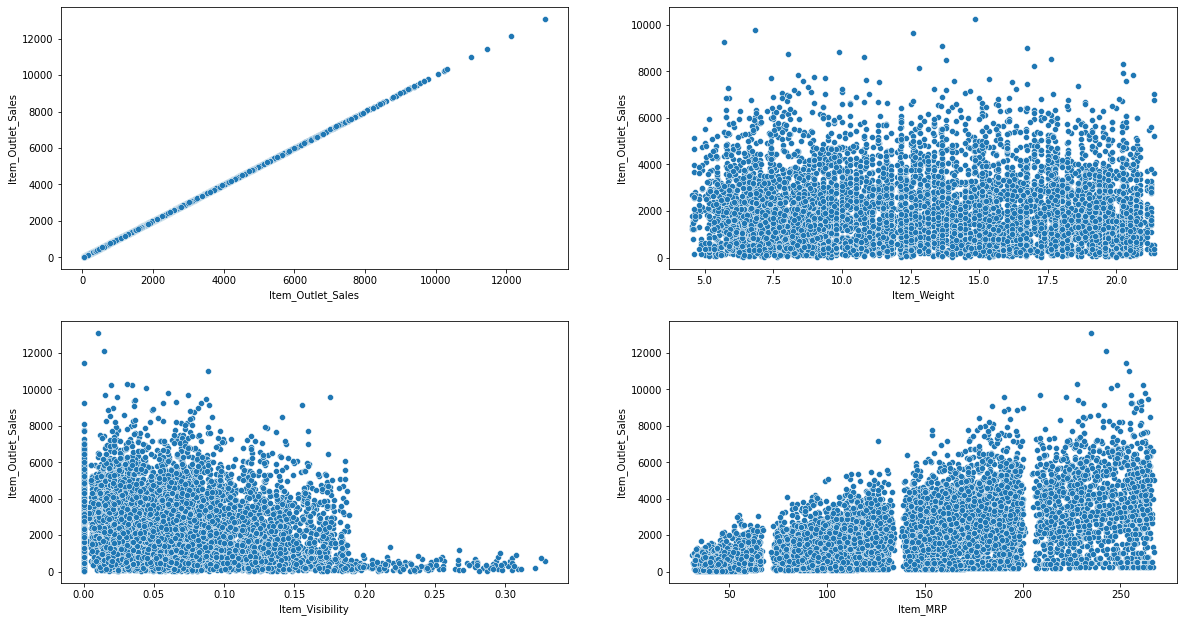

In [ ]:
# y와의 관계 확인 _연속형
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(top=1, bottom=0.2)
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]

for i in range(1,5):
    sns.scatterplot(x=df[dist_plots[i-1]], y=df['Item_Outlet_Sales'], ax=globals()['ax{}'.format(i)])